<hr><font color="green"><h1>from file: 12.1 Scales_and_Transformations_Practice</h1></font>

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


Once again, we make use of the Pokأ©mon data for this exercise.

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## TO DO **Task 1**
There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokأ©mon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

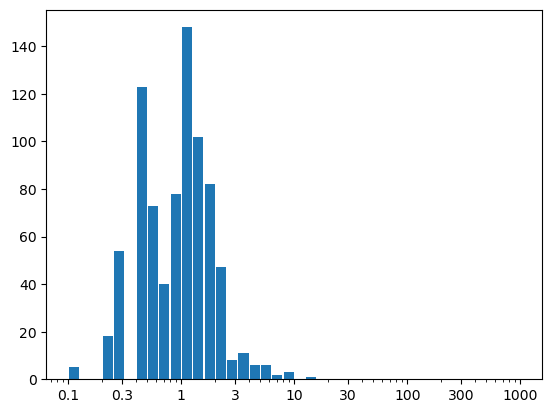

In [13]:

bins = 10 ** np.arange(-1, 3+0.1, 0.1)

ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=pokemon, x='height', bins=bins,rwidth=0.9);
plt.xscale('log')
plt.xticks(ticks, labels);


## TO DO **Task 2**
In this task, you should plot the distribution of Pokأ©mon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

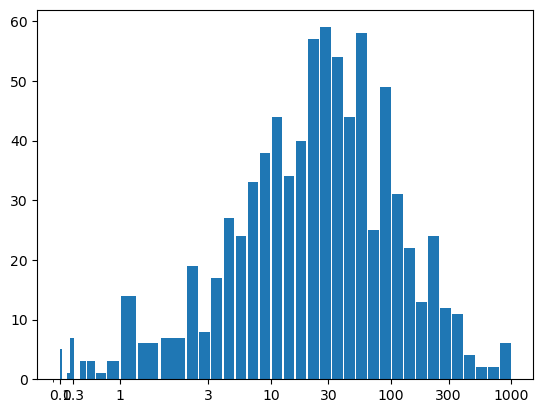

In [17]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins , rwidth = 0.9);

plt.xscale('symlog')
# Apply x-ticks
plt.xticks(ticks, labels);

<hr><font color="green"><h1>from file: 3-1 Bar_Chart_Practice</h1></font>

## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokأ©mon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [4]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokأ©mon introduced over the series' history. Display the count of Pokأ©mon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB
None
               id  generation_id      height      weight  base_experience  \
count  807.000

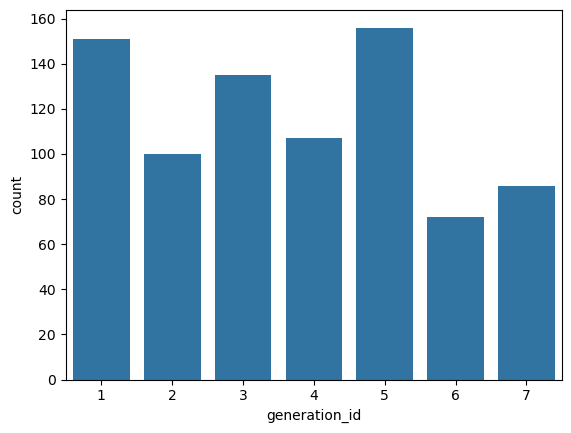

In [5]:
print(pokemon.info())
print(pokemon.describe())

pokemon_count_per_generation = pokemon['generation_id'].value_counts()

# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

### **TO DO Task 2** 
1. Each Pokأ©mon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [6]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


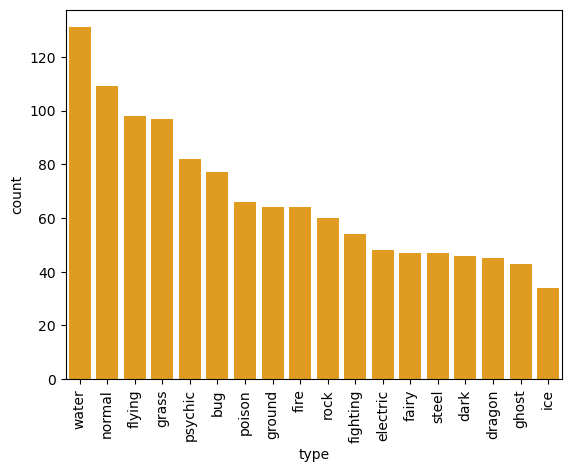

In [7]:
order =pkmn_types.type.value_counts().index
sb.countplot(data=pkmn_types, x='type',order=order,color='orange');
plt.xticks(rotation=90);

2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokأ©mon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokأ©mon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

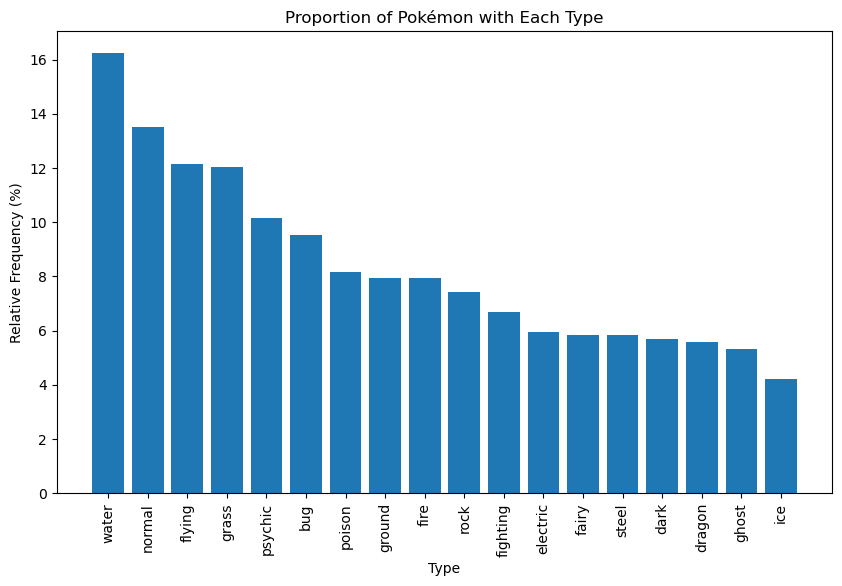

In [11]:
type_frequencies = (pkmn_types['type'].value_counts() / pokemon['id'].count()) * 100
type_frequencies_sorted = type_frequencies.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(type_frequencies_sorted.index, type_frequencies_sorted.values)
plt.xlabel('Type')
plt.ylabel('Relative Frequency (%)')
plt.title('Proportion of Pokأ©mon with Each Type')
plt.xticks(rotation=90)
plt.show()


<hr><font color="green"><h1>from file: 8.1 Histogram_Practice</h1></font>

### Preparatory Step

In [2]:
# Prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### About the Dataset
We'll continue working with the Pokأ©mon dataset in this workspace. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).


In [3]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task**
Pokأ©mon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. 

**Hint**: Try playing around with different bin width sizes to see what best depicts the data.

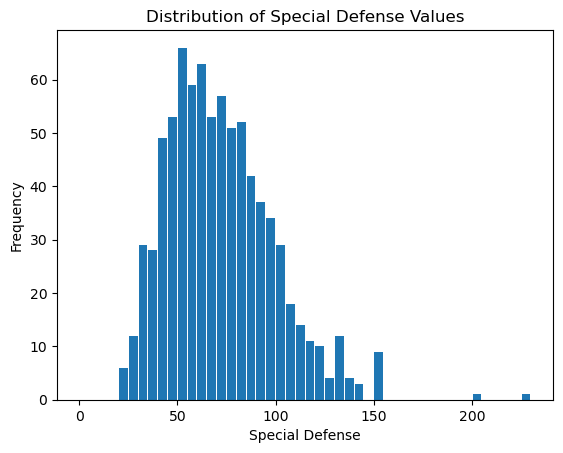

In [10]:
bins = np.arange(0, pokemon['special-defense'].max()+5, 5)
plt.hist(pokemon['special-defense'], bins=bins , rwidth = 0.9)
plt.xlabel('Special Defense')
plt.ylabel('Frequency')
plt.title('Distribution of Special Defense Values')
plt.show()



<h1 style= "color:red" > another solution </h1>

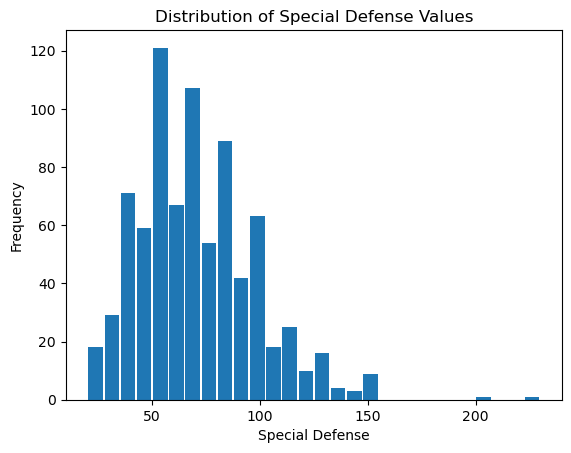

In [9]:
plt.hist(pokemon['special-defense'], bins='auto' , rwidth = 0.9)
plt.xlabel('Special Defense')
plt.ylabel('Frequency')
plt.title('Distribution of Special Defense Values')
plt.show()
